# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct statistical tests on a real-world dataset

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.power import TTestIndPower, TTestPower
%matplotlib inline

In [3]:
df = pd.read_csv('multipleChoiceResponses_cleaned.csv')
df_meta = pd.read_csv('schema.csv')

/opt/conda/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, resul

In [4]:
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

In [16]:
df.loc[df.AdjustedCompensation<=0, "AdjustedCompensation"] = np.nan
df = df.loc[df.AdjustedCompensation.notnull()]

In [24]:
df.FormalEducation.unique()

array(["Master's degree", "Bachelor's degree", 'Doctoral degree',
       "Some college/university study without earning a bachelor's degree",
       'I did not complete any formal education past high school',
       'Professional degree', 'I prefer not to answer', nan], dtype=object)

In [17]:
df_ba_ma_salary = df.groupby('FormalEducation').AdjustedCompensation.describe().loc[["Bachelor's degree", "Master's degree"],['count', 'mean', 'std']]
df_ba_ma_salary.rename(index={"Bachelor's degree":"ba", "Master's degree":"ma"}, inplace=True)
df_ba_ma_salary

,count,mean,std
FormalEducation,,,
ba,1099.0,65359.433558,308001.849049
ma,1969.0,69877.298499,136059.055666


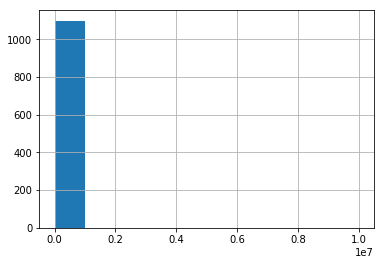

In [18]:
df.loc[((df.FormalEducation == "Bachelor's degree")), 
       "AdjustedCompensation"].hist()

In [19]:
pooled_var = (df_ba_ma_salary.loc['ba','std']**2/(df_ba_ma_salary.loc['ba','count']-1)
              +df_ba_ma_salary.loc['ma','std']**2/(df_ba_ma_salary.loc['ma','count']-1)
             )/(df_ba_ma_salary.loc['ba','count']+df_ba_ma_salary.loc['ma','count']-2)

In [20]:
(df_ba_ma_salary.loc['ma','count']-df_ba_ma_salary.loc['ba','count'])/(pooled_var**0.5)

4.921664539624141

In [22]:
stats.ttest_ind(df.loc[df.FormalEducation=="Bachelor's degree",
                       "AdjustedCompensation"],
                df.loc[df.FormalEducation=="Master's degree",
                       "AdjustedCompensation"],
                equal_var=False)

Ttest_indResult(statistic=-0.46177351618704626, pvalue=0.644318624812539)

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [25]:
stats.ttest_ind(df.loc[df.FormalEducation=="Bachelor's degree",
                       "AdjustedCompensation"],
                df.loc[df.FormalEducation=="Doctoral degree",
                       "AdjustedCompensation"],
                equal_var=False)

Ttest_indResult(statistic=-1.0081189360791378, pvalue=0.31365112800392136)

In [11]:
#Your code here

Median Values: 
s1:74131.92 
s2:38399.4
Sample sizes: 
s1: 967 
s2: 1107
Welch's t-test p-value: 0.1568238199472023


Repeated Test with Ouliers Removed:
Sample sizes: 
s1: 964 
s2: 1103
Welch's t-test p-value with outliers removed: 0.0


## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [26]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [27]:
formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df         F   PR(>F)
C(FormalEducation)  6.566443e+17     6.0  0.587606  0.74053
Residual            7.999370e+20  4295.0       NaN      NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!